In [1]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt'

In [2]:
import urllib.request

In [3]:
urllib.request.urlretrieve(url, 'location.txt')

('location.txt', <http.client.HTTPMessage at 0x1a208add30>)

In [4]:
col1 = []
col2 = []
col3 = []

In [5]:
for i, line in enumerate(open('location.txt')):
    if i == 0:
        continue
    c = line.split(',')
    col1.append(c[0])
    col2.append(float(c[1]))
    col3.append(float(c[2]))

## visualization

In [6]:
%matplotlib inline

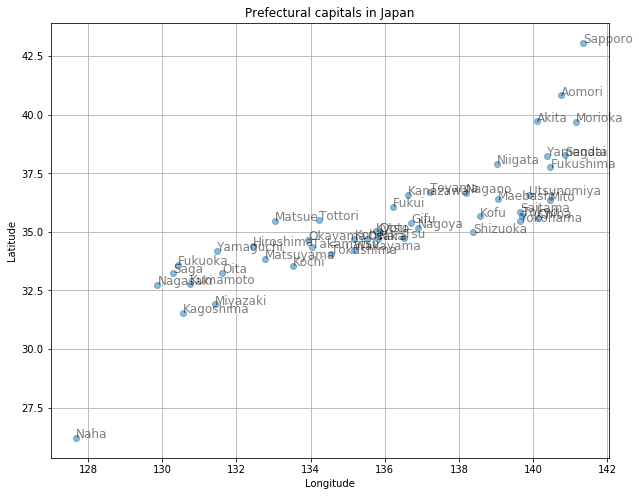

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(col3, col2, alpha=0.5)
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.show()

In [8]:
import math

In [9]:
def distance(x1, x2, y1, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [10]:
dist = pd.DataFrame(columns=col1, index=col1)
for i, city1 in enumerate(zip(col1, col2, col3)):
    for j, city2 in enumerate(zip(col1, col2, col3)):
        if i >= j:
            continue
        dist.loc[city1[0], city2[0]] = distance(city1[1], city2[1], city1[2], city2[2])

In [11]:
dist.head(5)

,Sapporo,Aomori,Morioka,Sendai,Akita,Yamagata,Fukushima,Mito,Utsunomiya,Maebashi,...,Matsuyama,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Naha
Sapporo,NaN,2.32051,3.36618,4.81875,3.56951,4.92288,5.3864,6.78279,6.66106,7.0538,...,12.597,12.3054,14.453,14.778,15.4314,14.766,13.8315,14.9284,15.7715,21.6964
Aomori,NaN,NaN,1.19433,2.55895,1.27643,2.61119,3.08647,4.49264,4.34386,4.74068,...,10.5992,10.2345,12.5953,12.8995,13.5411,12.8267,11.8686,12.8933,13.7658,19.597
Morioka,NaN,NaN,NaN,1.46189,1.05011,1.66232,2.07013,3.43551,3.38463,3.91762,...,10.232,9.78943,12.3452,12.6276,13.2529,12.4975,11.5245,12.4647,13.3625,19.0654
Sendai,NaN,NaN,NaN,NaN,1.64126,0.509398,0.657717,1.97386,1.96906,2.60887,...,9.23606,8.72147,11.4465,11.704,12.3077,11.5171,10.5379,11.388,12.3037,17.8705
Akita,NaN,NaN,NaN,NaN,NaN,1.50089,2.00221,3.39471,3.16037,3.48674,...,9.40006,9.00639,11.452,11.7457,12.38,11.6462,10.6807,11.6737,12.5561,18.3495


## distance <= 7

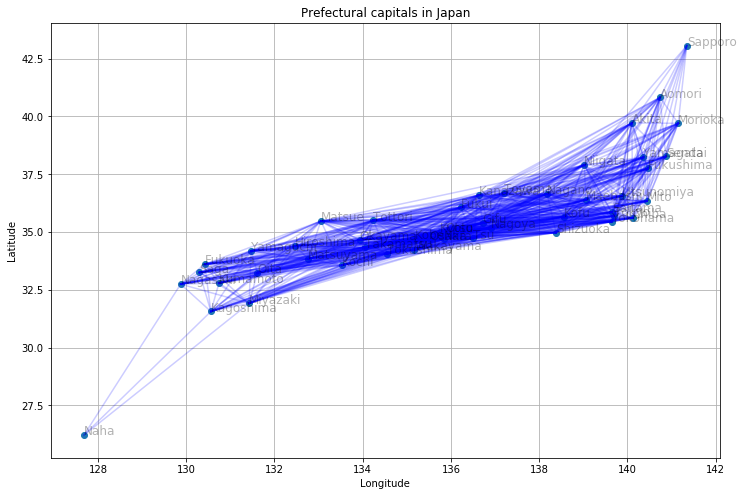

In [12]:
plt.figure(figsize=(12, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, x2, y1, y2) > 7:
            continue
        plt.plot([x1, x2], [y1, y2], c='b', alpha=0.2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

## distance < 1

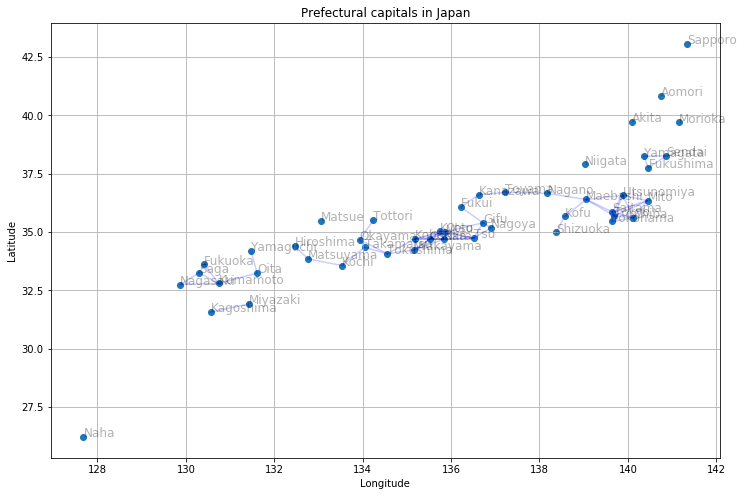

In [13]:
plt.figure(figsize=(12, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, x2, y1, y2) > 1:
            continue
        plt.plot([x1, x2], [y1, y2], c='b', alpha=0.2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

## get list of edges

In [14]:
edges = []
for i, city1 in enumerate(zip(col1, col2, col3)):
    for j, city2 in enumerate(zip(col1, col2, col3)):
        if i >= j:
            continue
        if distance(city1[1], city2[1], city1[2], city2[2]) > 1:
            continue
        edges.append((city1[0], city2[0]))

In [15]:
edges

[('Sendai', 'Yamagata'),
 ('Sendai', 'Fukushima'),
 ('Yamagata', 'Fukushima'),
 ('Mito', 'Utsunomiya'),
 ('Mito', 'Saitama'),
 ('Mito', 'Chiba'),
 ('Mito', 'Tokyo'),
 ('Utsunomiya', 'Maebashi'),
 ('Utsunomiya', 'Saitama'),
 ('Utsunomiya', 'Chiba'),
 ('Utsunomiya', 'Tokyo'),
 ('Maebashi', 'Saitama'),
 ('Maebashi', 'Tokyo'),
 ('Maebashi', 'Kofu'),
 ('Maebashi', 'Nagano'),
 ('Saitama', 'Chiba'),
 ('Saitama', 'Tokyo'),
 ('Saitama', 'Yokohama'),
 ('Chiba', 'Tokyo'),
 ('Chiba', 'Yokohama'),
 ('Tokyo', 'Yokohama'),
 ('Toyama', 'Kanazawa'),
 ('Toyama', 'Nagano'),
 ('Kanazawa', 'Fukui'),
 ('Fukui', 'Gifu'),
 ('Kofu', 'Shizuoka'),
 ('Gifu', 'Nagoya'),
 ('Gifu', 'Tsu'),
 ('Gifu', 'Otsu'),
 ('Nagoya', 'Tsu'),
 ('Tsu', 'Otsu'),
 ('Tsu', 'Kyoto'),
 ('Tsu', 'Osaka'),
 ('Tsu', 'Nara'),
 ('Otsu', 'Kyoto'),
 ('Otsu', 'Osaka'),
 ('Otsu', 'Kobe'),
 ('Otsu', 'Nara'),
 ('Kyoto', 'Osaka'),
 ('Kyoto', 'Kobe'),
 ('Kyoto', 'Nara'),
 ('Kyoto', 'Wakayama'),
 ('Osaka', 'Kobe'),
 ('Osaka', 'Nara'),
 ('Osaka', 'Waka

In [16]:
neighbor1 = {}
for i, city1 in enumerate(zip(col1, col2, col3)):
    for j, city2 in enumerate(zip(col1, col2, col3)):
        if i >= j:
            continue
        if distance(city1[1], city2[1], city1[2], city2[2]) > 1:
            continue
        if city1[0] not in neighbor1.keys():
            neighbor1.update({city1[0]:[]})
        if city2[0] not in neighbor1[city1[0]]:
            neighbor1[city1[0]].append(city2[0])
        if city2[0] not in neighbor1.keys():
            neighbor1.update({city2[0]:[]})
        if city1[0] not in neighbor1[city2[0]]:
            neighbor1[city2[0]].append(city1[0])

In [17]:
neighbor1

{'Sendai': ['Yamagata', 'Fukushima'],
 'Yamagata': ['Sendai', 'Fukushima'],
 'Fukushima': ['Sendai', 'Yamagata'],
 'Mito': ['Utsunomiya', 'Saitama', 'Chiba', 'Tokyo'],
 'Utsunomiya': ['Mito', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo'],
 'Saitama': ['Mito', 'Utsunomiya', 'Maebashi', 'Chiba', 'Tokyo', 'Yokohama'],
 'Chiba': ['Mito', 'Utsunomiya', 'Saitama', 'Tokyo', 'Yokohama'],
 'Tokyo': ['Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama'],
 'Maebashi': ['Utsunomiya', 'Saitama', 'Tokyo', 'Kofu', 'Nagano'],
 'Kofu': ['Maebashi', 'Shizuoka'],
 'Nagano': ['Maebashi', 'Toyama'],
 'Yokohama': ['Saitama', 'Chiba', 'Tokyo'],
 'Toyama': ['Kanazawa', 'Nagano'],
 'Kanazawa': ['Toyama', 'Fukui'],
 'Fukui': ['Kanazawa', 'Gifu'],
 'Gifu': ['Fukui', 'Nagoya', 'Tsu', 'Otsu'],
 'Shizuoka': ['Kofu'],
 'Nagoya': ['Gifu', 'Tsu'],
 'Tsu': ['Gifu', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Nara'],
 'Otsu': ['Gifu', 'Tsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara'],
 'Kyoto': ['Tsu', 'Otsu', 'Osaka', 'Kobe', '

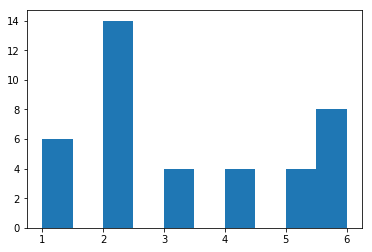

In [18]:
plt.hist([len(x) for x in neighbor1.values()])
plt.show()

## depth-first search

In [19]:
def depth_first(neighbor, start):
    visited = []
    stack = []
    stack.append(start)
    result = []
    while len(stack) > 0:
        next_city = stack.pop()
        if next_city in visited:
            continue
        result.append(next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            stack.append(nei)
    return result

In [20]:
positions = pd.read_csv('location.txt', index_col=0)

In [21]:
result = depth_first(neighbor1, 'Tokyo')
latitudes = []
longitudes = []
for city in result:
    position = positions.loc[city]
    latitudes.append(position.Latitude)
    longitudes.append(position.Longitude)

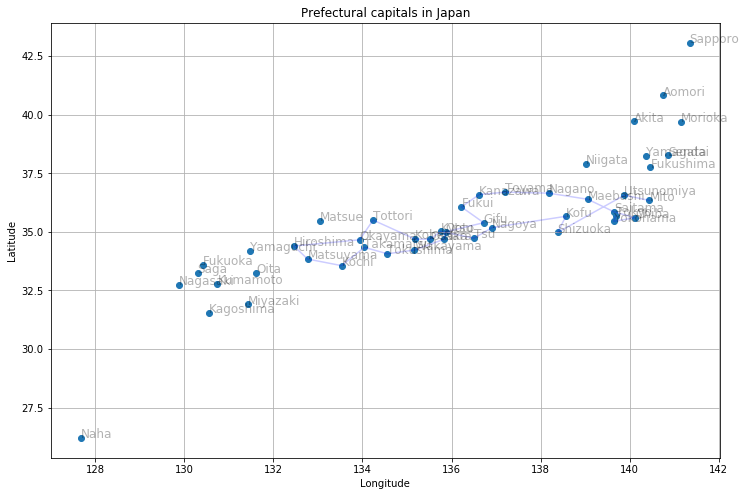

In [22]:
plt.figure(figsize=(12, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.scatter(col3, col2)
plt.plot(latitudes, longitudes, c='b', alpha=0.2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

## bereadth first search

In [23]:
def width_first(neighbor, start):
    visited = []
    queue = []
    queue.append(start)
    result = []
    while len(queue) > 0:
        next_city = queue.pop(0)
        if next_city in visited:
            continue
        result.append (next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            queue.append(nei)
    return result

In [24]:
result = width_first(neighbor1, 'Tokyo')

In [25]:
latitudes = []
longitudes = []
for city in result:
    position = positions.loc[city]
    latitudes.append(position.Latitude)
    longitudes.append(position.Longitude)

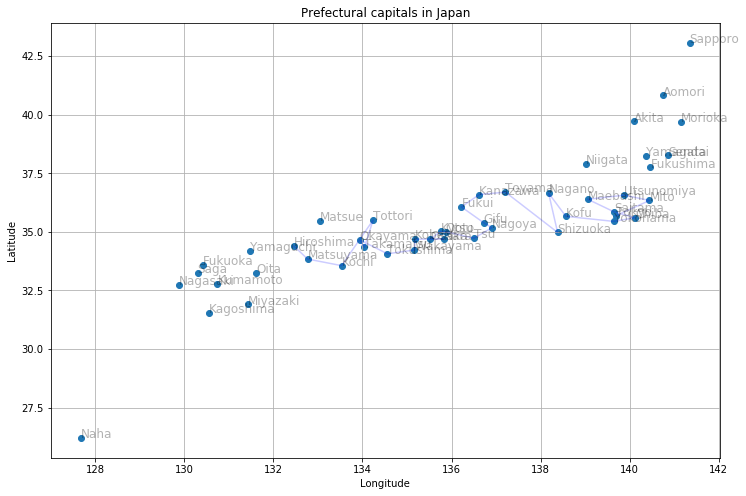

In [26]:
plt.figure(figsize=(12, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.scatter(col3, col2)
plt.plot(latitudes, longitudes, c='b', alpha=0.2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

## connected component

In [27]:
def connected_component(neighbors):
    visited = []
    result = []
    for city in neighbors.keys():
        if city in visited:
            continue
        component = width_first(neighbors, city)
        result.append(component)
        for city2 in component:
            visited.append(city2)
    return result

In [28]:
result = connected_component(neighbor1)

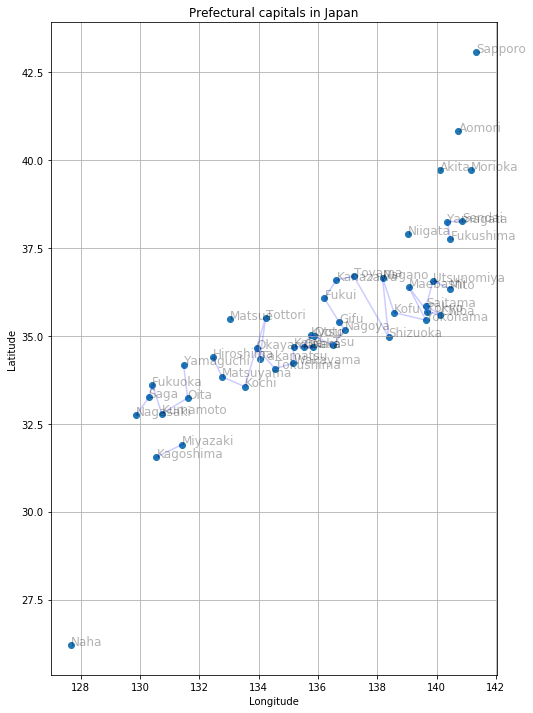

In [29]:
plt.figure(figsize=(8, 12))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.scatter(col3, col2)
for compo in result:
    latitudes = []
    longitudes = []
    for city in compo:
        position = positions.loc[city]
        latitudes.append(position.Latitude)
        longitudes.append(position.Longitude)
    plt.plot(latitudes, longitudes, c='b', alpha=0.2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

## travel in Japan

In [30]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/walk.txt'
urllib.request.urlretrieve(url, 'walk.txt')

('walk.txt', <http.client.HTTPMessage at 0x1a2143d9e8>)

In [31]:
walk_hours = pd.read_csv('walk.txt', sep='\s+')

In [32]:
walk_hours.head(5)

,Town1,Town2,Hour,Ferry
0,Sapporo,Aomori,55,True
1,Akita,Aomori,36,NaN
2,Akita,Sendai,45,NaN
3,Akita,Niigata,52,NaN
4,Yamagata,Aomori,75,NaN


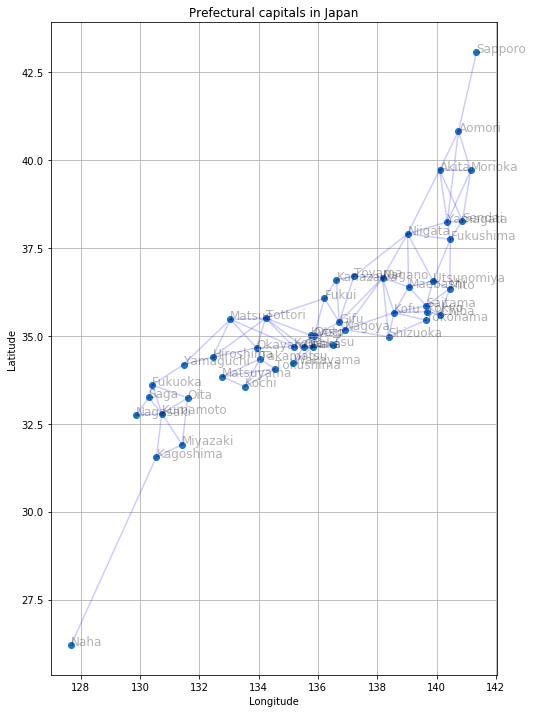

In [33]:
plt.figure(figsize=(8, 12))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.scatter(col3, col2)
for city1, city2 in zip(walk_hours.Town1, walk_hours.Town2):
    p1 = positions.loc[city1]
    p2 = positions.loc[city2]
    plt.plot([p1.Latitude, p2.Latitude], [p1.Longitude, p2.Longitude], c='b', alpha=0.2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

In [34]:
walk_neighbors = {}
df = walk_hours.set_index('Town1')
keys = df.index
for city in keys:
    tmp = df.loc[city]
    if type(tmp) == pd.Series:
        walk_neighbors[city] = [[tmp.Hour, tmp.Town2]]
    else:
        walk_neighbors[city] = [[tmp.iloc[i].Hour, tmp.iloc[i].Town2] for i in range(tmp.shape[0])]

In [35]:
walk_neighbors['Tokyo']

[[5, 'Saitama'], [8, 'Chiba'], [7, 'Yokohama'], [28, 'Kofu']]